# Pymaceuticals Inc.
---

### Analysis

- Capomulin was a success in reducing tumor sizes in test mice.
- When reviewing tumor sizes in the mice, Capomulin was in the top two drugs to return the smallest tumor size over the course of the treatment
- When compared to the other leading drug, Ramicane, Capomulin had a higher correlation rate between Weight and Tumor Volume. 
- This indicates that when using the correct dosage of Capomulin, the drug will consistently reduce Tumor Volumes within a larger range of weight than Ramicane.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data_df=pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")

# Display the data table for preview
total_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(total_data_df["Mouse ID"].unique())

249

In [3]:
total_data_df[["Mouse ID", "Timepoint"]].value_counts()

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Name: count, Length: 1888, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = total_data_df.loc[total_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = total_data_df.loc[total_data_df["Mouse ID"].isin(duplicate_mice)]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = total_data_df[total_data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean_volume = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_volume = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_volume = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_volume = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_volume = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({
    'Mean': mean_volume,
    'Median': median_volume,
    'Variance': variance_volume,
    'Standard Deviation': std_dev_volume,
    'SEM': sem_volume
}).reset_index()

summary_stats


,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
adv_summary_stats = clean_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem='sem'
).reset_index()

adv_summary_stats

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

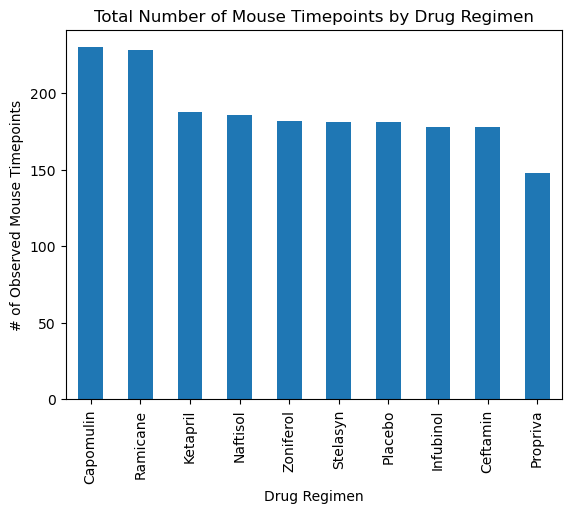

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_counts = clean_data_df['Drug Regimen'].value_counts()

total_counts.plot(kind="bar",)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Mouse Timepoints by Drug Regimen")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

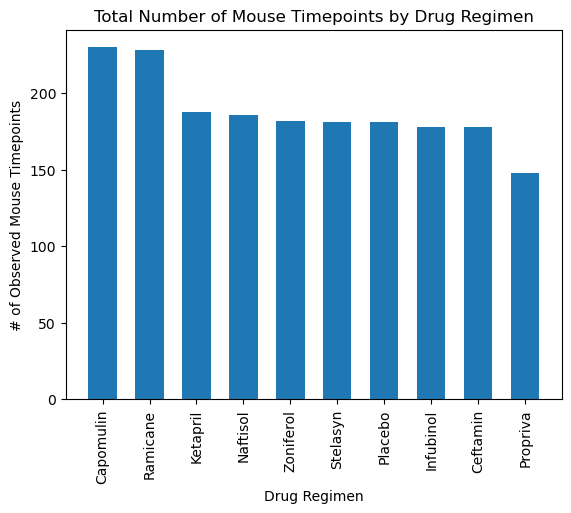

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(total_counts.index, total_counts.values, width=0.6)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Total Number of Mouse Timepoints by Drug Regimen")
plt.xticks(rotation=90)
plt.show

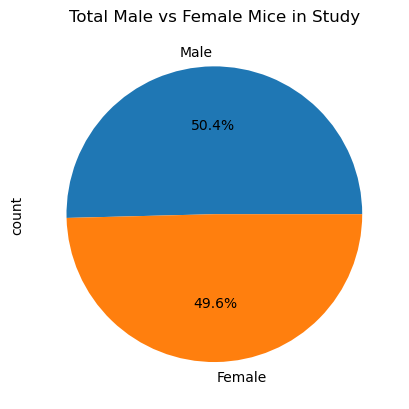

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_data_df[['Mouse ID', 'Sex']].drop_duplicates()
gender = unique_mice['Sex'].value_counts()

# Make the pie chart
gender.plot(kind="pie",autopct='%1.1f%%', startangle=0)
plt.title("Total Male vs Female Mice in Study")
plt.show()

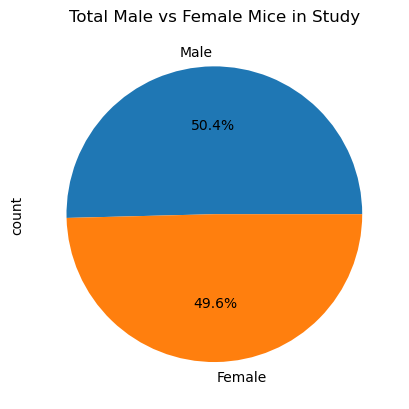

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
male = len(unique_mice.query("Sex == 'Male'"))
female = len(unique_mice.query("Sex == 'Female'"))
sex_type = [male, female]
labels = ["Male", "Female"]
plt.ylabel("count")
plt.title("Total Male vs Female Mice in Study")

# Make the pie chart
plt.pie(sex_type, autopct="%1.1f%%", startangle=0, labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df= pd.merge(last_timepoint_df, clean_data_df, on=['Mouse ID', 'Timepoint'])
final_tumor_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] 

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for regimen in treatment_list:
    regimen_volumes = final_tumor_df.loc[final_tumor_df['Drug Regimen']==regimen, 'Tumor Volume (mm3)']

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume.append(regimen_volumes)

    # add subset


    # Determine outliers using upper and lower bounds
outliers = {}

# Loop through each regimen to calculate IQR and determine outliers
for i, regimen in enumerate(treatment_list):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = tumor_volume[i].quantile(0.25)
    Q3 = tumor_volume[i].quantile(0.75)
    IQR = Q3 - Q1 

    # Determine the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Store the outlier information
    outliers[regimen] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': tumor_volume[i][(tumor_volume[i] < lower_bound) | (tumor_volume[i] > upper_bound)]
    }

# Display outliers for each regimen
for regimen, details in outliers.items():
    print(f"{regimen}'s potential outliers: {details['outliers']}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\kbuma\AppData\Local\Temp\ipykernel_16048\355825211.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=treatment_list, flierprops=flierprops)


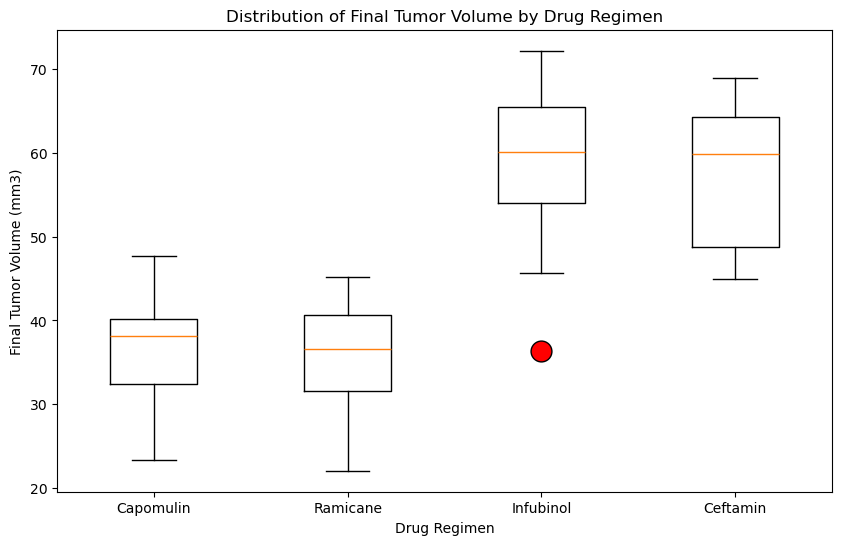

In [17]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))

# Create a list of tumor volumes for each drug regimen
data_to_plot = [final_tumor_df.loc[final_tumor_df['Drug Regimen'] == regimen, 'Tumor Volume (mm3)'] for regimen in treatment_list]

# Create the box plot
flierprops = dict(marker='o', markerfacecolor='red', markersize=15, linestyle='none')
plt.boxplot(data_to_plot, labels=treatment_list, flierprops=flierprops)

# Add titles and labels
plt.title('Distribution of Final Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks(rotation=0)

# Show the plot
plt.show()

## Line and Scatter Plots

In [18]:
# Query data to filter down to single mouse and treatment
single_mouse_df = clean_data_df.query("`Mouse ID` == 'l509' and `Drug Regimen` == 'Capomulin'")
single_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


Text(0, 0.5, 'Final Tumor Volume (mm3)')

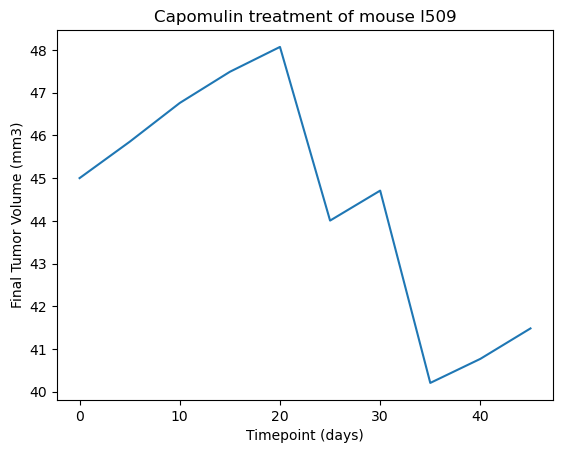

In [59]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(single_mouse_df['Timepoint'], single_mouse_df['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Final Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

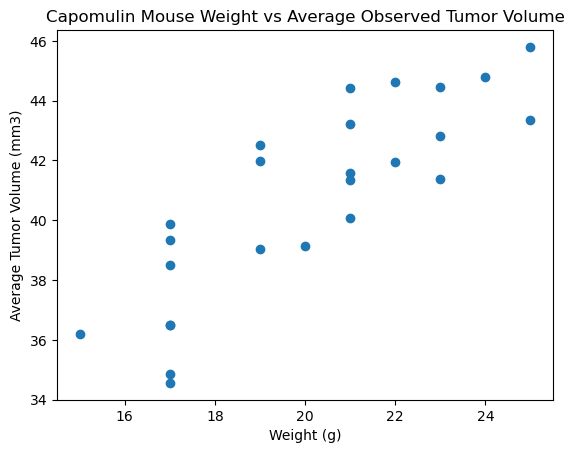

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter to Capomulin
capomulin_df = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']

# calculate the average tumor volume by mouse weight
avg_tumor_volume = capomulin_df.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()

# Scatter Plot
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.title('Capomulin Mouse Weight vs Average Observed Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


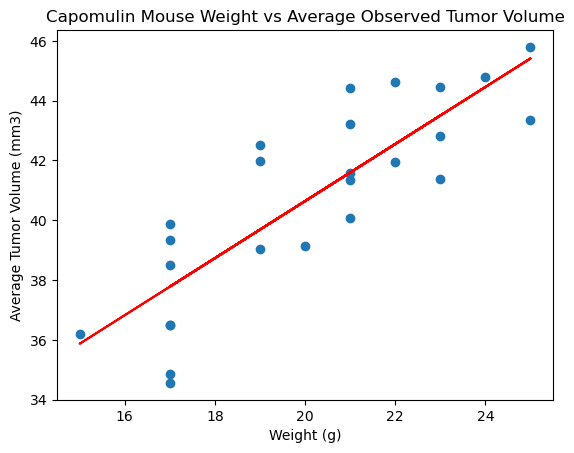

In [30]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])

regression_line = slope * avg_tumor_volume['Weight (g)'] + intercept

plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.plot(avg_tumor_volume['Weight (g)'], regression_line, color='red')
plt.title('Capomulin Mouse Weight vs Average Observed Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

print(f'The correlation between mouse weight and the average tumor volume is {r_value:.2f}')


The correlation between mouse weight and the average tumor volume is 0.81


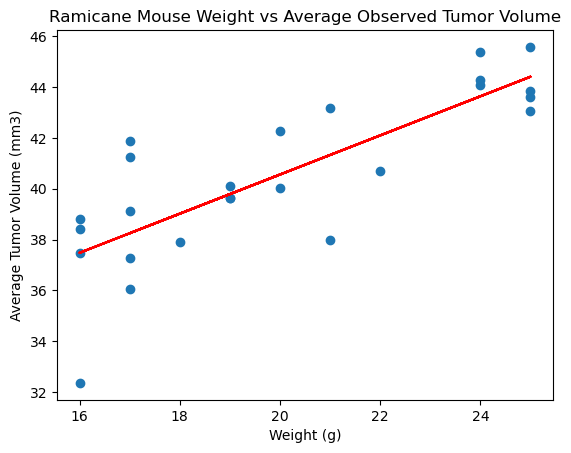

In [14]:
# Filter to Ramicane
ramicane_df = clean_data_df[clean_data_df['Drug Regimen'] == 'Ramicane']

# calculate the average tumor volume by mouse weight
avg_tumor_volume2 = ramicane_df.groupby(['Mouse ID'])[['Weight (g)','Tumor Volume (mm3)']].mean()

slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume2['Weight (g)'], avg_tumor_volume2['Tumor Volume (mm3)'])

regression_line = slope * avg_tumor_volume2['Weight (g)'] + intercept
# Scatter Plot
plt.scatter(avg_tumor_volume2['Weight (g)'], avg_tumor_volume2['Tumor Volume (mm3)'])
plt.title('Ramicane Mouse Weight vs Average Observed Tumor Volume')
plt.plot(avg_tumor_volume2['Weight (g)'], regression_line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


print(f'The correlation between mouse weight and the average tumor volume is {r_value:.2f}')
